In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings; warnings.simplefilter('ignore')

In [2]:
#importing data

df = pd.read_excel("Book1.xlsx")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
#checking null values - there are none based on below, but this will be reviewed with further data exploration

df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
#checking y values - data is imbalanced and will need to be addressed in model

print(df['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


In [5]:
#dropping duration since source said it's not useful
#creating new variables for eda

df = df.drop(['duration'], axis = 1)
jobs_eda = df['job']
month_eda = df['month']


In [6]:
#creating dummy variables for models and eda

job = pd.get_dummies(df['job'])
marital = pd.get_dummies(df['marital'])
education = pd.get_dummies(df['education'])
contact = pd.get_dummies(df['contact'])
month = pd.get_dummies(df['month'])
poutcome = pd.get_dummies(df['poutcome'])

In [7]:
#concatenating dummy variables and removing old columns
#removing null values 'unknown' and 'other'
#moving y column to top

df = pd.concat([df,job, marital, education, contact, month, poutcome], axis = 1)
df.drop(['job', 'education','marital','contact','month', 'poutcome', 'unknown', 'other'], axis =1,
        inplace=True)


In [8]:
#converting yes and no values to 0 and 1 using cat codes

df['y'] = df['y'].astype('category')
df['y'] = df['y'].cat.codes

df['loan'] = df['loan'].astype('category')
df['loan'] = df['loan'].cat.codes

df['housing'] = df['housing'].astype('category')
df['housing'] = df['housing'].cat.codes

df['default'] = df['default'].astype('category')
df['default'] = df['default'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

In [9]:
#double checking columns

print(df.columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'campaign',
       'pdays', 'previous', 'y', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'divorced', 'married', 'single',
       'primary', 'secondary', 'tertiary', 'cellular', 'telephone', 'apr',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'failure', 'success'],
      dtype='object')


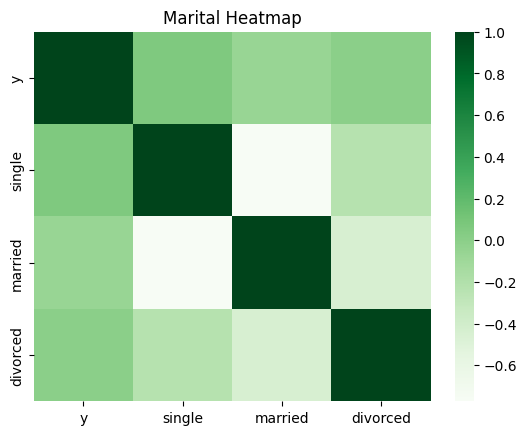

In [10]:
#heatmap of marital - each indicate a correlation so will keep

hmdf = df[['y','single','married','divorced']]
sns.heatmap(hmdf.corr(), cmap = 'Greens')
plt.title('Marital Heatmap');

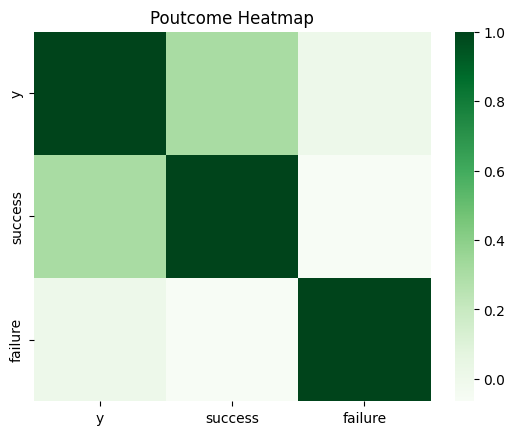

In [11]:
#heatmap for poutcome - success vs failure seems like very important feature so will keep

hmdf1 = df[['y','success','failure']]
sns.heatmap(hmdf1.corr(), cmap = 'Greens');
plt.title('Poutcome Heatmap');

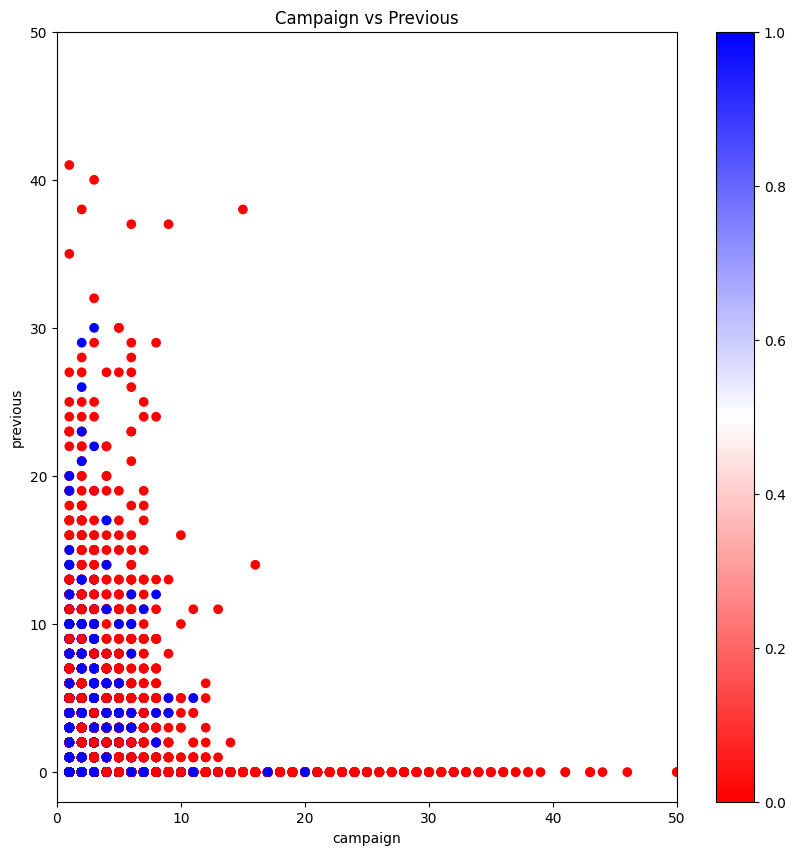

In [12]:
#reviewing previous and campaign since they are similar features - removing both since they are similar but with different outcomes

plt.figure(figsize = (10,10))
plt.scatter(df['campaign'], df['previous'], c = df['y'], cmap= 'bwr_r')
plt.title('Campaign vs Previous')
plt.xlabel('campaign')
plt.ylabel('previous')
plt.colorbar()
plt.axis([0, 50, -2, 50]);

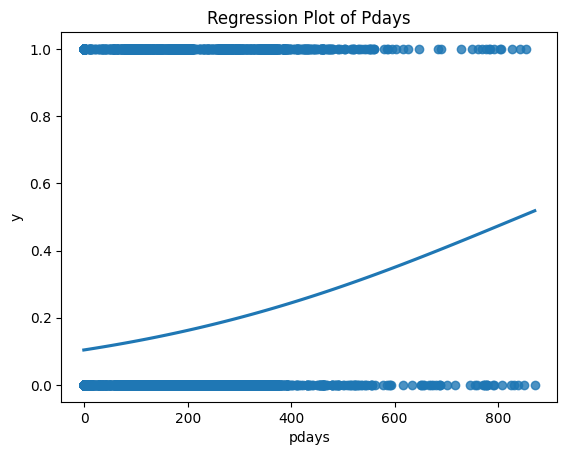

In [13]:
#regression plot of pdays - outliers and -1 (wasn't contacted previously) seem to throw it off and contact is less important based on other features (campaign, previous) so will remove

sns.regplot(x = 'pdays', y = 'y', data = df, logistic=True, ci=None)
plt.title('Regression Plot of Pdays');

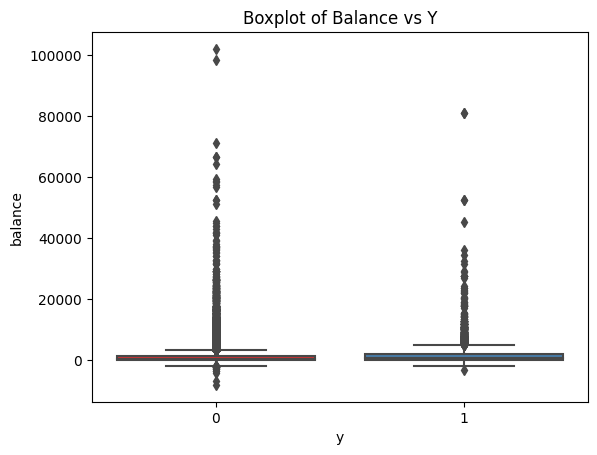

In [14]:
#boxplot of balance - balance varies widely, will remove

sns.boxplot(y = 'balance', x = 'y', data = df, palette='Set1').set(
    title = "Boxplot of Balance vs Y");

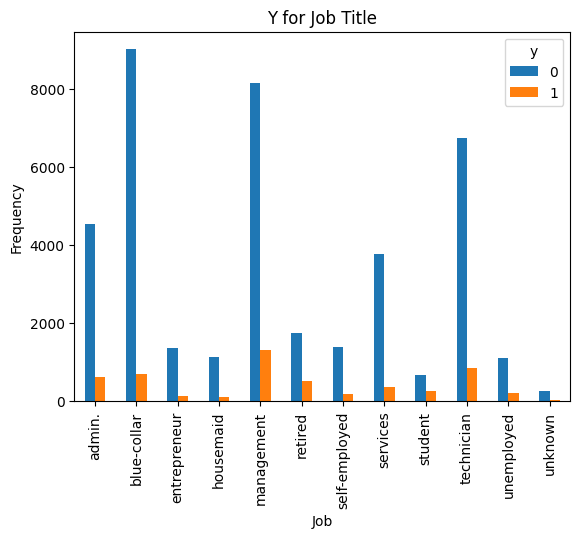

In [15]:
#job - yes's and no's vary per job so will keep

%matplotlib inline
pd.crosstab(jobs_eda,df.y).plot(kind='bar')
plt.title('Y for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency');

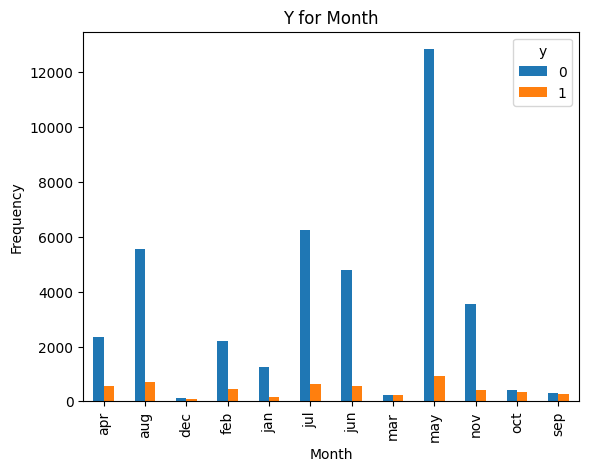

In [16]:
#month - there does seem to be differences per month so will keep

%matplotlib inline
pd.crosstab(month_eda,df.y).plot(kind='bar')
plt.title('Y for Month')
plt.xlabel('Month')
plt.ylabel('Frequency');

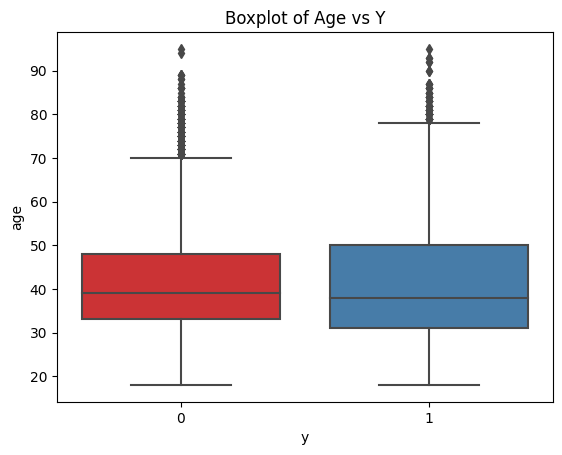

In [17]:
#age - wider range of yes's than no's, but won't help model. Will remove

sns.boxplot(y = 'age', x = 'y', data = df, palette='Set1').set(
    title = "Boxplot of Age vs Y");


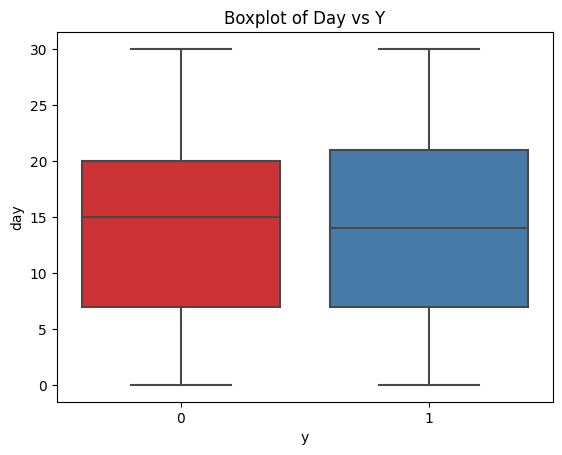

In [18]:
#day - not enough difference to keep and too many variables within the days themselves, will remove

sns.boxplot(y = 'day', x = 'y', data = df, palette='Set1').set(
    title = "Boxplot of Day vs Y");

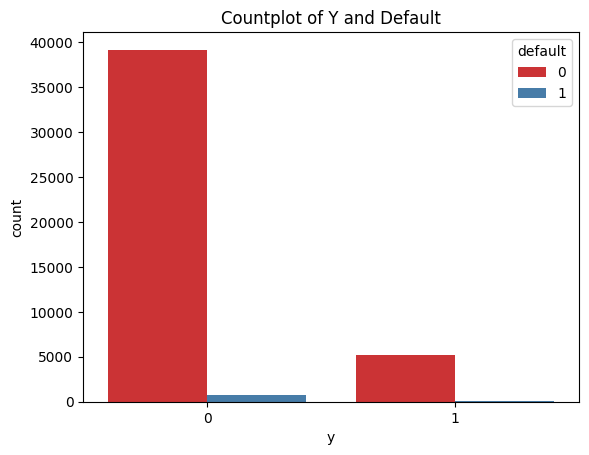

In [19]:
#default - very little defaults so will remove

sns.countplot(x='y', hue = 'default', data = df, palette='Set1').set(
    title = 'Countplot of Y and Default');


In [20]:
#removing pdays, , campaign, previous, balance, age, day and default
#checking new columns

df = df.drop(['pdays', 'campaign', 'previous', 'balance', 'age', 'day', 'default'], axis = 1)
print(df.columns)

Index(['housing', 'loan', 'y', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'divorced', 'married', 'single',
       'primary', 'secondary', 'tertiary', 'cellular', 'telephone', 'apr',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'failure', 'success'],
      dtype='object')


In [21]:
#splitting data into X and y

X = df.drop(columns = 'y')
y = df['y']

In [22]:
#######logistic regression model####################

In [23]:
#train, test, split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split (X, y, test_size = 0.3, random_state = 19)

In [24]:
#scaling data

sc_X=StandardScaler().set_output(transform='pandas')
X_train_lr=sc_X.fit_transform(X_train_lr)

In [25]:
#fitting model and balancing class weight

log_reg = LogisticRegression(random_state=19, class_weight = 'balanced').fit(X_train_lr, y_train_lr)

In [26]:
#checking train set of model

y_pred_train_lr = log_reg.predict(X_train_lr)
print(classification_report(y_train_lr, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     27896
           1       0.27      0.61      0.38      3751

    accuracy                           0.76     31647
   macro avg       0.60      0.70      0.61     31647
weighted avg       0.86      0.76      0.79     31647



In [27]:
#score for test model

y_pred_test_lr = log_reg.predict(X_test_lr)
print(classification_report(y_test_lr, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.95      0.48      0.64     12026
           1       0.17      0.80      0.27      1538

    accuracy                           0.52     13564
   macro avg       0.56      0.64      0.46     13564
weighted avg       0.86      0.52      0.60     13564



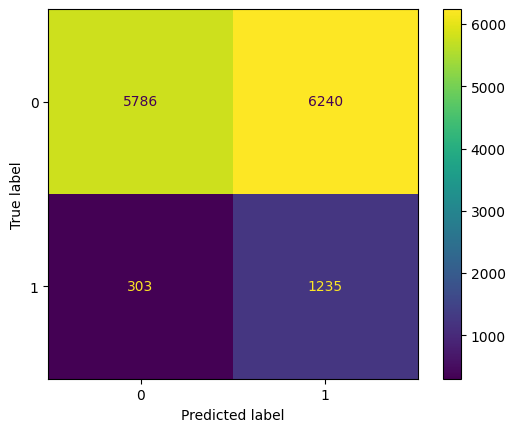

In [28]:
#confusion matrix for test score

lrcm = metrics.confusion_matrix(y_test_lr, y_pred_test_lr)
lrcm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lrcm, display_labels = [0 , 1])
lrcm_display.plot();

In [29]:
#new model with additional parameters

log_reg1 = LogisticRegression(random_state = 19,
                              class_weight = 'balanced',
                              C = .01,
                              fit_intercept = True,
                              ).fit(X_train_lr, y_train_lr)

In [30]:
#score for train set of new model

y_pred_train_lr1 = log_reg1.predict(X_train_lr)
print(classification_report(y_train_lr, y_pred_train_lr1))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     27896
           1       0.27      0.61      0.38      3751

    accuracy                           0.76     31647
   macro avg       0.60      0.70      0.61     31647
weighted avg       0.86      0.76      0.79     31647



In [31]:
#score for test set of new model

y_pred_test_lr1 = log_reg1.predict(X_test_lr)
print(classification_report(y_test_lr, y_pred_test_lr1))

              precision    recall  f1-score   support

           0       0.95      0.61      0.74     12026
           1       0.19      0.73      0.30      1538

    accuracy                           0.62     13564
   macro avg       0.57      0.67      0.52     13564
weighted avg       0.86      0.62      0.69     13564



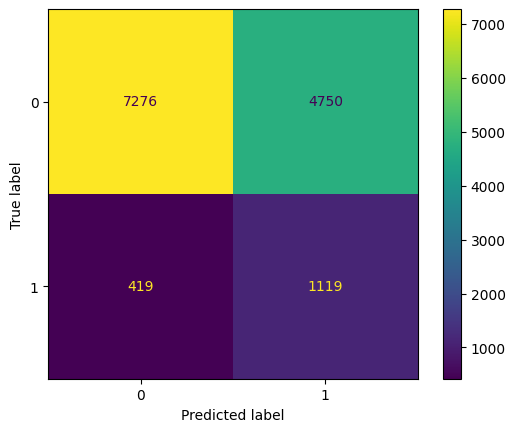

In [32]:
#confusion matrix for new model

lrcm1 = metrics.confusion_matrix(y_test_lr, y_pred_test_lr1)
lrcm1_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lrcm1, display_labels = [0 , 1])
lrcm1_display.plot();

In [33]:
################################decision tree model########################################

In [34]:
#train test split for decision tree

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.3, random_state = 19)

In [35]:
#fitting model and balancing classes - no scaling necessary for decision tree

dtree = DecisionTreeClassifier(random_state = 19, class_weight = 'balanced')
dtree.fit(X_train_dt, y_train_dt);

In [36]:
#train score for dt model

y_pred_train_dt = dtree.predict(X_train_dt)
print(classification_report(y_train_dt, y_pred_train_dt))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     27896
           1       0.37      0.77      0.50      3751

    accuracy                           0.82     31647
   macro avg       0.67      0.80      0.70     31647
weighted avg       0.89      0.82      0.84     31647



In [37]:
#test score for dt model

y_pred_test_dt = dtree.predict(X_test_dt)
print(classification_report(y_test_dt, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86     12026
           1       0.25      0.49      0.33      1538

    accuracy                           0.77     13564
   macro avg       0.59      0.65      0.60     13564
weighted avg       0.85      0.77      0.80     13564



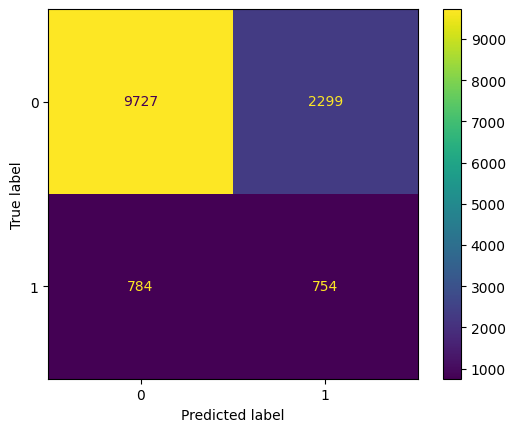

In [38]:
#confusion matrix

dtcm = metrics.confusion_matrix(y_test_dt, y_pred_test_dt)
dtcm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dtcm, display_labels = [0 , 1])
dtcm_display.plot();

In [39]:
#new model with additional parameters

dtree1 = DecisionTreeClassifier(random_state = 19, max_depth=7, class_weight = 'balanced')
dtree1.fit(X_train_dt, y_train_dt);

In [40]:
#new train score

y_pred_train_dt1 = dtree1.predict(X_train_dt)
print(classification_report(y_train_dt, y_pred_train_dt1))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     27896
           1       0.30      0.60      0.40      3751

    accuracy                           0.79     31647
   macro avg       0.62      0.71      0.64     31647
weighted avg       0.86      0.79      0.82     31647



In [41]:
#new test score

y_pred_test_dt1 = dtree1.predict(X_test_dt)
print(classification_report(y_test_dt, y_pred_test_dt1))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87     12026
           1       0.29      0.57      0.38      1538

    accuracy                           0.79     13564
   macro avg       0.61      0.69      0.63     13564
weighted avg       0.86      0.79      0.82     13564



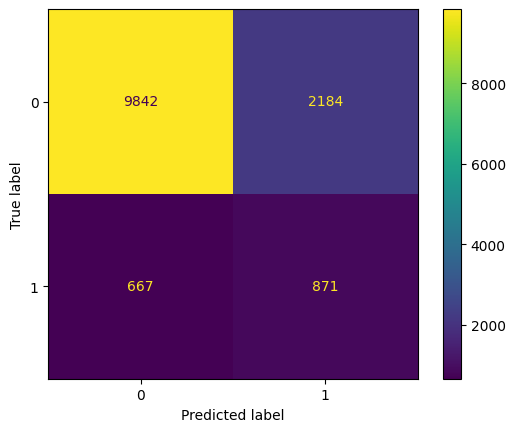

In [42]:
dtcm1 = metrics.confusion_matrix(y_test_dt, y_pred_test_dt1)
dtcm1_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dtcm1, display_labels = [0 , 1])
dtcm1_display.plot();